In [4]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import re
import csv

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as lm
from scipy import stats

import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import scipy.sparse
import math

In [5]:
#data frame with only labeled abstracts
df = pd.read_csv("/home/seh6fy/git/publicrd/data/prd/Digital_abstract_labelled/labelled_abstracts.csv")
#data frame with all of the abstracts
df_big = pd.read_pickle("/home/seh6fy/git/publicrd/data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")

In [6]:
df = df[~df.label.isnull()]
df = df[~df.ABSTRACT.isnull()]

In [7]:
df_big = df_big[~df_big.ABSTRACT.isnull()]

In [8]:
#creates a dataframe with the training and testing data 
both = [df, df_big]
new_df= pd.concat(both)

In [9]:
new_df= new_df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

In [56]:
new_df['index']=new_df.index

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
training = v.fit_transform(new_df['ABSTRACT'])


In [11]:
train_df = new_df[~new_df.label.isnull()]

In [12]:
train_df= train_df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

In [13]:
training_data = train_df.sample(frac=0.80, random_state=25)
testing_data = train_df.drop(training_data.index)

In [16]:
train_id = training_data.index
test_id = testing_data.index

In [17]:
x_train= training[train_id]
x_test= training[test_id]

In [18]:
train_df['index'] = train_df.index
y_test = train_df.loc[train_df["index"].isin(test_id)]
y_test = y_test['label']

In [19]:
train_df['index'] = train_df.index
y_train = train_df.loc[train_df["index"].isin(train_id)]
y_train = y_train['label']

In [20]:
neighbors = int(math.sqrt(len(train_df.index)))

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 30)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [46]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto', ))
# clf.fit(x_train, y_train)


In [47]:
y_pred = classifier.predict(x_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
confusion = (confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Big-data       0.61      0.49      0.54       104
Non Big-data       0.66      0.76      0.71       136

    accuracy                           0.64       240
   macro avg       0.63      0.62      0.62       240
weighted avg       0.64      0.64      0.63       240



In [30]:
print(confusion_matrix(y_test, y_pred))

[[ 50  54]
 [ 34 102]]


In [31]:
from sklearn.metrics import plot_confusion_matrix

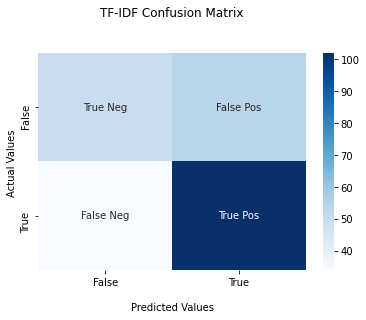

<Figure size 432x288 with 0 Axes>

In [28]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')

ax.set_title('TF-IDF Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('tfidf.PNG')

In [32]:
corpus_test = training[new_df.index]

In [33]:
corpus_pred = classifier.predict(corpus_test)

In [34]:
predictions2 = new_df.loc[new_df.index,]
predictions2['PREDICTIONS'] = corpus_pred

In [35]:
predictions2 = predictions2[["label", "PREDICTIONS","ABSTRACT"]]

In [37]:
big_data = predictions2.loc[predictions2['PREDICTIONS'] == 'Big-data']

In [57]:
index = big_data.index

In [60]:
final_frame = new_df.loc[new_df["index"].isin(index)]

In [62]:
final_frame = final_frame[final_frame.label.isnull()]

In [65]:
final_frame

,Unnamed: 0,Duplicates,index,PROJECT_ID,ABSTRACT,Is it related to Big-Data,Expert name,label,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
1204,NaN,NaN,1204,90001,The Center for Molecular Interfacing (CMI) wil...,NaN,NaN,NaN,Address; Architecture; Carbon Nanotubes; Catal...,CCI PHASE I: CENTER FOR MOLECULAR INTERFACING,NSF,NSF,NaN,0847926,10/1/2008,9/30/2011,"ABRUNA, HECTOR D",NaN,22,872612445,CORNELL UNIVERSITY ITHACA,ITHACA,NY,14850-2820,UNITED STATES,NaN,NaN,47.049,2008,1519821.0,NaN,1.0,1.0,1519821.0,1.0,center molecular interfacing cmi enable integr...
1205,NaN,NaN,1205,90002,DRU: Integrated optimization of evacuation and...,NaN,NaN,NaN,Accounting; Address; Affect; American; Area; b...,DRU: INTEGRATED OPTIMIZATION OF EVACUATION AND...,NSF,NSF,NaN,0826832,9/1/2008,8/31/2012,"DAVIDSON, RACHEL A","NOZICK, LINDA; WACHTENDORF, TRICIA",00,059007500,UNIVERSITY OF DELAWARE,NEWARK,DE,19716-2553,UNITED STATES,NaN,NaN,47.075,2008,757499.0,NaN,1.0,1.0,757499.0,1.0,dru integrated optimization evacuation_shelter...
1211,NaN,NaN,1211,89992,ABSTRACT: The United States over the past two ...,NaN,NaN,NaN,Address; Award; Biomedical Research; Biotechno...,MOD AND DAT: PATENT POOLS AND BIOMEDICAL INNOV...,NSF,NSF,NaN,0830288,10/1/2008,9/30/2011,"LERNER, JOSH","TIROLE, JEAN",08,054552435,NATIONAL BUREAU OF ECONOMIC RESEARCH,CAMBRIDGE,MA,02138-5317,UNITED STATES,NaN,NaN,47.075,2008,400000.0,NaN,1.0,1.0,400000.0,1.0,united_states past decade see explosion patent...
1212,NaN,NaN,1212,90011,The Ohio State University College of Education...,NaN,NaN,NaN,career; career development; Collaborations; Co...,MATH AND SCIENCE MIDDLE SCHOOL PATHWAYS PORTAL...,NSF,NSF,NaN,0840824,9/1/2008,8/31/2011,"LIGHTLE, KIMBERLY S","KAHLE, JANE; HENTON, MARY; NAIR-PILLAI, SARITA",15,071650709,OHIO STATE UNIVERSITY RESEARCH FOUNDATION,COLUMBUS,OH,43210-1016,UNITED STATES,NaN,NaN,47.076,2008,2369022.0,NaN,1.0,1.0,2369022.0,1.0,ohio state university college education osu na...
1214,NaN,NaN,1214,90013,This multidisciplinary project draws upon soci...,NaN,NaN,NaN,career; Collaborations; Communities; Complex; ...,CDI-TYPE II: WHAT DRIVES THE DYNAMIC CREATION ...,NSF,NSF,NaN,0835614,9/15/2008,8/31/2012,"MCFARLAND, DANIEL","JURAFSKY, DANIEL; MANNING, CHRISTOPHER; POWELL...",14,009214214,STANFORD UNIVERSITY,STANFORD,CA,94305-6203,UNITED STATES,NaN,NaN,47.076,2008,1186174.0,NaN,1.0,1.0,1186174.0,1.0,multidisciplinary project draw sociology compu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145052,NaN,NaN,1145052,1294171,The recent geological record can offer useful ...,NaN,NaN,NaN,NaN,Collaborative Research: Neotoma Paleoecology...,NSF,NSF,NaN,1948297,6/1/2020 12:00:00 AM,5/31/2023 12:00:00 AM,NaN,NaN,NaN,041071101,KENT STATE UNIVERSITY AT KENT,NaN,NaN,NaN,NaN,NaN,NaN,47.050,2020,14559.0,NaN,1.0,0.0,14559.0,1.0,recent geological record offer useful insight ...
1145053,NaN,NaN,1145053,1294174,The recent geological record can offer useful ...,NaN,NaN,NaN,NaN,Collaborative Research: Neotoma Paleoecology D...,NSF,NSF,NaN,1948229,6/1/2020 12:00:00 AM,5/31/2023 12:00:00 AM,NaN,NaN,NaN,003403953,PENNSYLVANIA STATE UNIVERSITY-UNIV PARK,NaN,NaN,NaN,NaN,NaN,NaN,47.050,2020,74849.0,NaN,9.0,0.0,604915.0,9.0,recent geological record offer useful insight ...
1145060,NaN,NaN,1145060,1294181,This Rapid Response Research (RAPID) project e...,NaN,NaN,NaN,NaN,"RAPID: Impacts, Disruption, and Displacement A...",NSF,NSF,NaN,2024139,10/1/2019 12:00:00 AM,1/31/2022 12:00:00 AM,NaN,NaN,NaN,804878247,STATE UNIVERSITY NEW YORK STONY 

In [64]:
final_frame.to_csv(r'tfidf_refined.csv')

In [28]:
# merged_inner = merged_inner[[ "PREDICTIONS","ABSTRACT", "PROJECT_ID","PROJECT_TERMS","PROJECT_TITLE","DEPARTMENT","AGENCY","PROJECT_NUMBER","PROJECT_START_DATE","PROJECT_END_DATE","FY_TOTAL_COST"]]

In [ ]:
# merged_inner.to_csv(r'"C:/project/biocomplexity/sdad/projects_data/ncses/prd/Digital_abstract_labelled/"tfidf_dataframe.csv')

In [172]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [171]:
# error = []

# # Calculating error for K values between 1 and 40
# for i in range(1, 40):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train, y_train)
#     pred_i = knn.predict(x_test)
#     error.append(np.mean(pred_i != y_test))

In [ ]:
#https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/